### Task 1

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
ds=pd.read_csv('haberman.csv',header=None)
ds.columns = ['Age', 'YearOfOperation','AxillaryNodes', 'SurvivalStatus']
ds.head()

,Age,YearOfOperation,AxillaryNodes,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [10]:
Training_data= ds[(ds['YearOfOperation'] >= 58) & (ds['YearOfOperation'] <= 65)]
Testing_data= ds[ds['YearOfOperation'] > 65]
print('count \nTraining data:',len(Training_data),'\nTesting data:',len(Testing_data))

count 
Training data: 229 
Testing data: 77


In [11]:
X_train=Training_data.iloc[:,0:3].values
y_train=Training_data.iloc[:,3].values
X_test=Testing_data.iloc[:,0:3].values
y_test=Testing_data.iloc[:,3].values

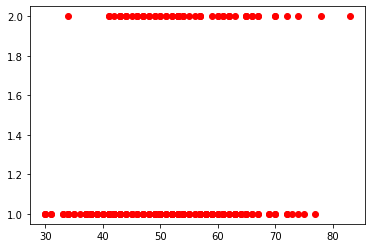

In [12]:
X_age=Training_data.iloc[:,0:1].values
dia=plt.scatter(X_age, y_train, color = 'red')

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### number of nodes is the hidden layers
- the number of hidder layers can be increased by adding new paramaters in hidden_layer_sizes eg: hidden_layer_sizes=(10,5,2)

In [7]:
mlp=MLPClassifier(hidden_layer_sizes=1,max_iter=10000,random_state=20)
mlp.fit(X_train,y_train)
mlp.score(X_train, y_train)

0.7205240174672489

In [10]:
y_pred=mlp.predict(X_test).round()
#print(np.c_[y_test , y_pred])
mlp.score(X_test, y_pred)

1.0

In [11]:
confusion_matrix(y_test,y_pred)

array([[60,  0],
       [17,  0]], dtype=int64)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      1.00      0.88        60
           2       0.00      0.00      0.00        17

    accuracy                           0.78        77
   macro avg       0.39      0.50      0.44        77
weighted avg       0.61      0.78      0.68        77



C:\Users\vigne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Task 2

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

In [14]:
mlp=MLPClassifier(hidden_layer_sizes=10,max_iter=10000,random_state=20)
cv_results = cross_validate(mlp, X_train, y_train, cv=5)
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

In [15]:
cv_results['test_score']

array([0.67391304, 0.80434783, 0.82608696, 0.73913043, 0.73333333])

### Task 3

### Task 4

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [17]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [18]:
y_pred=clf.predict(X_test)

In [19]:
confusion_matrix(y_test,y_pred)

array([[55,  5],
       [13,  4]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.92      0.86        60
           2       0.44      0.24      0.31        17

    accuracy                           0.77        77
   macro avg       0.63      0.58      0.58        77
weighted avg       0.73      0.77      0.74        77

